# Practica 3

## Analisis de Top N en Pie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/viajes_surfistas.csv')
df

,homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
0,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
1,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.022100,-118.481000
2,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.030400,-118.779000
3,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
4,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.888889,-118.405278
...,...,...,...,...,...,...,...,...,...
9506,"Bridgetown, Western Australia",Australia,Australia,-33.954448,116.131214,Australia,Australia,-34.225000,115.017000
9507,"Lille, France",Europe,France,50.629250,3.057256,Europe,France,45.002343,-1.201475
9508,MX,South America,Mexico,23.634501,-102.552784,South America,Mexico,21.016700,-101.250000
9509,Kuta - Bali - Indonesia,Asia,Indonesia,-8.739184,115.171130,Asia,Indonesia,-8.710093,115.166845


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9511 entries, 0 to 9510
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   homename         9511 non-null   object 
 1   homecontinent    9511 non-null   object 
 2   homecountry      9511 non-null   object 
 3   homelat          9511 non-null   float64
 4   homelon          9511 non-null   float64
 5   travelcontinent  9511 non-null   object 
 6   travelcountry    9511 non-null   object 
 7   travellat        9511 non-null   float64
 8   travellon        9511 non-null   float64
dtypes: float64(4), object(5)
memory usage: 668.9+ KB


In [4]:
df.describe()

,homelat,homelon,travellat,travellon
count,9511.000000,9511.000000,9511.000000,9511.000000
mean,23.346690,-11.493619,20.542341,-7.899712
std,27.376264,94.717285,27.246228,96.915648
min,-53.773631,-159.526124,-51.055000,-159.565978
25%,14.641528,-93.584627,9.358850,-89.384666
50%,34.052234,-8.224454,33.692900,-9.084691
75%,40.684327,28.897353,38.633333,100.360478
max,78.223172,178.065032,78.217424,177.451473


## Propuesta

In [6]:
df['homecountry'].unique() # muestra los paises unicos no repite

array(['United States of America', 'France', 'Indonesia', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Germany', 'Brazil',
       'Ireland', 'Japan', 'Colombia', 'Morocco', 'Chile', 'Kuwait',
       'Uruguay', 'Italy', 'South Korea', 'Venezuela', 'India', 'Peru',
       'New Zealand', 'Mexico', 'Oman', 'Netherlands', 'Bangladesh',
       'Kenya', 'Thailand', 'Switzerland', 'Argentina', 'Lebanon',
       'Malaysia', 'Poland', 'Dominican Republic', 'Portugal', 'Jordan',
       'Canada', 'Singapore', 'Costa Rica', 'United Arab Emirates',
       'Uzbekistan', 'Qatar', 'Panama', 'Saint Barthelemy',
       'South Africa', 'Ukraine', 'Greece', 'Norway', 'Turkey',
       'French Polynesia', 'Slovenia', 'Guatemala', 'Taiwan', 'Nicaragua',
       'Ecuador', 'Hong Kong S.A.R.', 'El Salvador', 'Paraguay', 'Russia',
       'Namibia', 'Puerto Rico', 'Belgium', 'Nigeria', 'Jersey', 'Cuba',
       'China', 'Uganda', 'Belarus', 'Sri Lanka', 'Romania', 'Slovakia',
       'Sweden', 'Lux

In [7]:
len(df['homecountry'].unique())

101

In [8]:
# interesa es saber cunatos sufistas hay por pais para saberlo se puede asi
df['homecountry'].value_counts()

homecountry
United States of America    2826
Japan                        893
Australia                    809
Spain                        752
United Kingdom               496
                            ... 
Grenada                        1
Isle of Man                    1
Nepal                          1
Hungary                        1
Latvia                         1
Name: count, Length: 101, dtype: int64

In [13]:
# como tambien lo puedo agrupar y contar
agrup = df.groupby('homecountry').agg({
    'homename':'count'
})
agrup

,homename
homecountry,
Andorra,1
Argentina,143
Australia,809
Austria,3
Bahrain,2
...,...
United States Virgin Islands,2
United States of America,2826
Uruguay,21


In [14]:
# Ahora, toca ordenar de mayor a menor
agrup_sort = agrup.sort_values('homename',ascending=False)
agrup_sort

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752
United Kingdom,496
...,...
Namibia,1
Nepal,1
Slovakia,1


In [19]:
# como se mostraba se muestra el top 4 y el resto
top4 = agrup_sort.head(4).reset_index()
top4

,homecountry,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [ ]:
# ahora lo otro
resto = agrup_sort.tail(len(agrup_sort)-4)
resto

,homename
homecountry,
United Kingdom,496
France,433
Brazil,379
Portugal,367
Italy,295
...,...
Namibia,1
Nepal,1
Slovakia,1


In [18]:
resto_sum = resto.sum()
resto_sum

homename    4231
dtype: int64

In [26]:
# ahora acomodo el top4
top4.columns=['Pais','Cantidad']
# se concatena horizontalmente
df_final = pd.concat([top4,pd.DataFrame({'Pais':['Otro'],'Cantidad':[resto_sum[0]]})]).set_index('Pais')
df_final

C:\Users\Scort\AppData\Local\Temp\ipykernel_11156\2934821331.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_final = pd.concat([top4,pd.DataFrame({'Pais':['Otro'],'Cantidad':[resto_sum[0]]})]).set_index('Pais')


,Cantidad
Pais,
United States of America,2826
Japan,893
Australia,809
Spain,752
Otro,4231


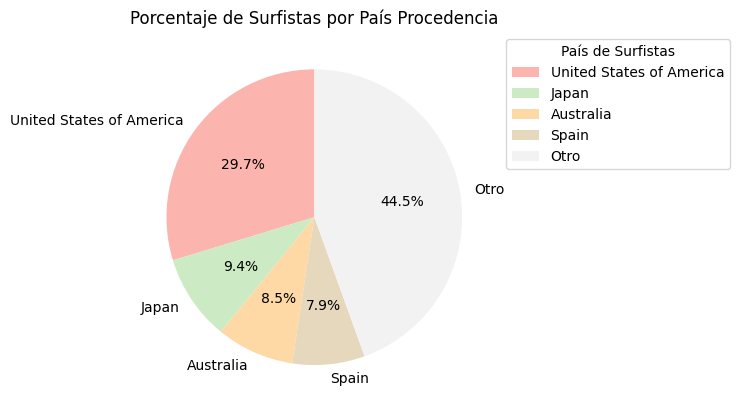

In [27]:
fig = df_final.plot.pie(
    y='Cantidad',
    startangle=90,
    autopct='%1.1f%%',
    colormap='Pastel1' # Colores Pasteles. Muy agradable a la vista.
)
fig.set_title('Porcentaje de Surfistas por País Procedencia')
fig.set_ylabel('') # Eliminar la etiqueta del eje Y
fig.legend(
    loc='upper left',
    bbox_to_anchor=(1.0, 1.0),
    title='País de Surfistas',
    
)


## Solucion

In [28]:
# Lo primero que haré será analizar cuantos paises unicos tengo
# Esto es parte de mi analisis exploratorio
df['homecountry'].unique()

array(['United States of America', 'France', 'Indonesia', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Germany', 'Brazil',
       'Ireland', 'Japan', 'Colombia', 'Morocco', 'Chile', 'Kuwait',
       'Uruguay', 'Italy', 'South Korea', 'Venezuela', 'India', 'Peru',
       'New Zealand', 'Mexico', 'Oman', 'Netherlands', 'Bangladesh',
       'Kenya', 'Thailand', 'Switzerland', 'Argentina', 'Lebanon',
       'Malaysia', 'Poland', 'Dominican Republic', 'Portugal', 'Jordan',
       'Canada', 'Singapore', 'Costa Rica', 'United Arab Emirates',
       'Uzbekistan', 'Qatar', 'Panama', 'Saint Barthelemy',
       'South Africa', 'Ukraine', 'Greece', 'Norway', 'Turkey',
       'French Polynesia', 'Slovenia', 'Guatemala', 'Taiwan', 'Nicaragua',
       'Ecuador', 'Hong Kong S.A.R.', 'El Salvador', 'Paraguay', 'Russia',
       'Namibia', 'Puerto Rico', 'Belgium', 'Nigeria', 'Jersey', 'Cuba',
       'China', 'Uganda', 'Belarus', 'Sri Lanka', 'Romania', 'Slovakia',
       'Sweden', 'Lux

In [29]:
len(df['homecountry'].unique())

101

In [30]:
# Me interesa saber cuantos surfistas hay por pais, por lo tanto me conviene hacer una agrupacion
agrupado = df.groupby('homecountry').agg({
    'homename': 'count'
})
agrupado

,homename
homecountry,
Andorra,1
Argentina,143
Australia,809
Austria,3
Bahrain,2
...,...
United States Virgin Islands,2
United States of America,2826
Uruguay,21


In [31]:
# Al ordenarla descendentemente, puedo ver cuales son los paises que mas surfistas tienen
agrupado_ordenado = agrupado.sort_values('homename', ascending=False)
agrupado_ordenado

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752
United Kingdom,496
...,...
Namibia,1
Nepal,1
Slovakia,1


In [32]:
# Sacar un top 4 es sencillo
df_top_4 = agrupado_ordenado.head(4)
df_top_4

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752


In [33]:
# Puedo hacer esto con un .drop() por indices
df_otros = agrupado_ordenado.drop(index=df_top_4.index.values)
df_otros

,homename
homecountry,
United Kingdom,496
France,433
Brazil,379
Portugal,367
Italy,295
...,...
Namibia,1
Nepal,1
Slovakia,1


In [34]:
# Ahora yo necesito sumar todos estos registros
# Esto lo puedo hacer con una agrupacion. El problema es que no tengo ningun campo por el cual agruparlos
# Por eso, creo una columna donde todos los valores sean el mismo
df_otros['pais'] = 'Otros'
df_otros

,homename,pais
homecountry,,
United Kingdom,496,Otros
France,433,Otros
Brazil,379,Otros
Portugal,367,Otros
Italy,295,Otros
...,...,...
Namibia,1,Otros
Nepal,1,Otros
Slovakia,1,Otros


In [35]:
# Ahora si, los puedo agrupar todos por esta columna nueva
df_otros_agrupado = df_otros.groupby('pais').agg({
    'homename': 'sum'
})
df_otros_agrupado

,homename
pais,
Otros,4231


In [36]:
# Pongo el indice como columna
df_otros_agrupado = df_otros_agrupado.reset_index()
df_otros_agrupado

,pais,homename
0,Otros,4231


In [37]:
df_top_4

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752


In [38]:
# Pongo el indice como columna en mi dataset de top 4
df_top_4 = df_top_4.reset_index()
df_top_4

,homecountry,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [39]:
# Renombro las columnas para que ambos tengan el mismo nombre
df_top_4.columns = ['pais', 'homename']
df_top_4

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [40]:
# Y ahora los uno en un mismo dataframe
df_final = pd.concat([df_top_4, df_otros_agrupado])
df_final

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752
0,Otros,4231


In [41]:
# Seteo el indice en la columna Pais ya que con esto puedo hacer un pie chart muy rapidamente con Pandas
df_final = df_final.set_index('pais')
df_final

,homename
pais,
United States of America,2826
Japan,893
Australia,809
Spain,752
Otros,4231


Text(0.5, 1.0, 'Porcentaje de Surfistas por País de Procedencia')

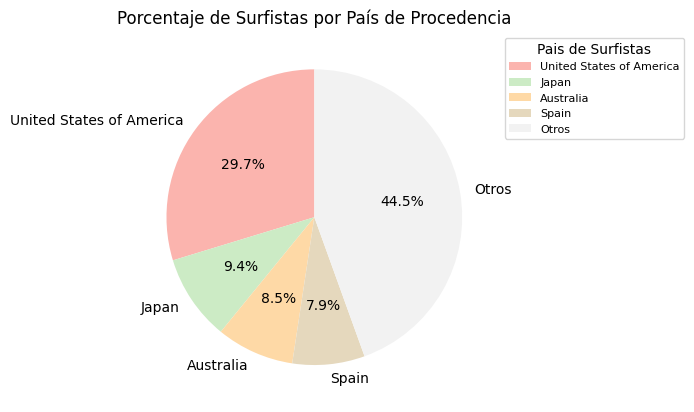

In [42]:
# Pie Chart con Pandas
ax = df_final.plot.pie( # Agarra el indice como etiquetas por defecto
    y='homename', 
    startangle=90,
    autopct='%1.1f%%',
    colormap='Pastel1' # Colores Pasteles. Muy agradable a la vista.
)

ax.set_ylabel('')
ax.legend(
    title='Pais de Surfistas',
    bbox_to_anchor=(1, 1),
    fontsize=8
)

ax.set_title('Porcentaje de Surfistas por País de Procedencia')